# Project: Video Game Sales Forecast

## Introduction

This project is an exploration of a dataset from 2016 of global video game sales from our online store, Ice. We want to identify patterns to determine what makes a game successful so that we can forecast sales for the following year.

## Stages

The project will be done in the following steps:
1. Data overview
2. Data preprocessing
3. Data analysis
4. Testing hypotheses
5. Conclusions

## Data Overview

In [1]:
# Load project libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Data Preprocessing

In [5]:
# Convert column names to lowercase
df = df.rename(columns=str.lower)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Convert data to appropriate types
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') # coerce 'tbd' values to NaN
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

We change the data types for the following columns:
* `year_of_release` to int - we don't need values of years to be floating numbers
* `user_score` to float - if we want to run the numbers for any type of calculation, these need to be numbers instead of strings (and to match `critic_score`'s data type)

### Find missing values

In [7]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

We notice that two rows for `name` and `genre` have missing rows, maybe due to clerical errors, so we should take a closer look.

In [8]:
df[df['name'].isnull() & df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The two rows that come back look to be unusable since they're missing critical bits of information (including the game's name, genre, and scores), so we'll drop them from the DataFrame and double-check that they were removed.

In [9]:
df.dropna(subset=['name', 'genre'], inplace=True)
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

### Find duplicate values

In [10]:
# Check for duplicated rows
df.duplicated().sum()

0

In [11]:
# Check for duplicated platforms
sorted(df['platform'].str.lower().unique())

['2600',
 '3do',
 '3ds',
 'dc',
 'ds',
 'gb',
 'gba',
 'gc',
 'gen',
 'gg',
 'n64',
 'nes',
 'ng',
 'pc',
 'pcfx',
 'ps',
 'ps2',
 'ps3',
 'ps4',
 'psp',
 'psv',
 'sat',
 'scd',
 'snes',
 'tg16',
 'wii',
 'wiiu',
 'ws',
 'x360',
 'xb',
 'xone']

In [12]:
# Check for duplicated genres
df['genre'] = df['genre'].fillna('').astype(str)
sorted(df['genre'].str.lower().unique())

['action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'puzzle',
 'racing',
 'role-playing',
 'shooter',
 'simulation',
 'sports',
 'strategy']

In [13]:
# Check for duplicated ratings
df['rating'] = df['rating'].fillna('Unknown').astype(str)
print(sorted(df['rating'].str.lower().unique()))
df[df['rating'] == 'K-A']

['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'rp', 't', 'unknown']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


From checking for missing values earlier, we notice a large amount of missing values for `ratings`. We fill in the missing ratings as "Unknown".

We also notice a specific rating category, "K-A" (Kids to Adults), that stands out. Upon looking up the data, only a few games use the rating, which was deprecated in 1998. Rather than dropping the rows now, we'll eventually filter these out from the DataFrame as part of the upcoming task to narrow down the sales period to what's relevant for our project.

In [14]:
# Convert user score to match critic score
df['user_score'] = df['user_score'].apply(lambda x: x * 10)
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

To further align critic & user scores, we update the number format for `user_score` to match `critic_score` (i.e. whole numbers between 0-100).

### Fix data

In [15]:
# Add a new column with total sales per game
all_sales = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.insert(8, 'total_sales', all_sales)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,Unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,84.0,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,Unknown


We add up sales from all regions into a new column and insert it after the other sales columns.

## Data Analysis

### Years

In [16]:
# Look at how many games were released in different years
# Group the data by year of release and sales count
game_sales_by_year = df.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count'
).reset_index()
game_sales_by_year = game_sales_by_year.rename(columns={'name':'count'})
game_sales_by_year

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


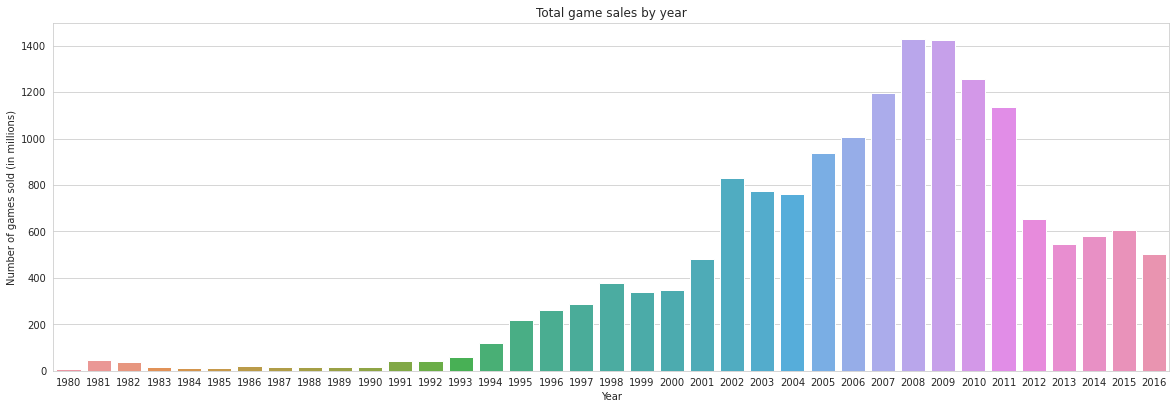

In [17]:
# Add plot to compare total sales counts by year
sns.set_style('whitegrid')
plt.figure(figsize=(20,6.4))
sns.barplot(
    data=game_sales_by_year,
    x='year_of_release',
    y='count'
)
plt.title('Total game sales by year')
plt.xlabel('Year')
plt.ylabel('Number of games sold (in millions)')
plt.show()

We find that a significant period for year of release happens between 2005 and 2011. The momentum starts slowly in the 1990s and looks to exponentially increase after 2000. The frequency declines after 2011 following the peak in sales, returning to circa early 2000s levels. 

Now, we only want to look at the current period for analysis in order to capture more recent trends for the forecast, so we modify the dataset to only contain relevant sales from the last 3 years (2013 to present) while disregarding older sales data.

In [18]:
df_recent = df.drop(df[df['year_of_release'] < 2013].index)
df_recent['year_of_release'].value_counts().sort_index()

2013    544
2014    581
2015    606
2016    502
Name: year_of_release, dtype: Int64

### Platforms

platform
PS4     314.14
PS3     189.74
XOne    159.32
X360    146.98
3DS     144.44
WiiU     64.63
PC       43.19
PSV      33.25
Wii      29.99
PS2      22.21
2600     10.50
PSP       8.02
XB        6.17
GBA       4.97
DS        4.88
PS        3.28
GC        2.20
GB        1.03
N64       0.67
Name: total_sales, dtype: float64


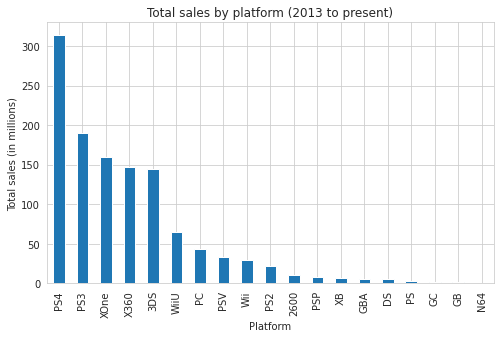

In [19]:
total_sales_platform = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(total_sales_platform)

total_sales_platform.plot(
    kind='bar',
    rot=90,
    figsize=(8,4.8),
    xlabel='Platform',
    ylabel='Total sales (in millions)',
    title='Total sales by platform (2013 to present)'
)
plt.show()

We get a picture of profitable platforms leading in sales. Based on the distribution, we see 5 top platforms stand out in total sales, with PS4 in the lead (followed closely by PS3). Next, we want to look at the top 5 platforms and their game sales.

platform
PS4     314.14
PS3     189.74
XOne    159.32
X360    146.98
3DS     144.44
Name: total_sales, dtype: float64


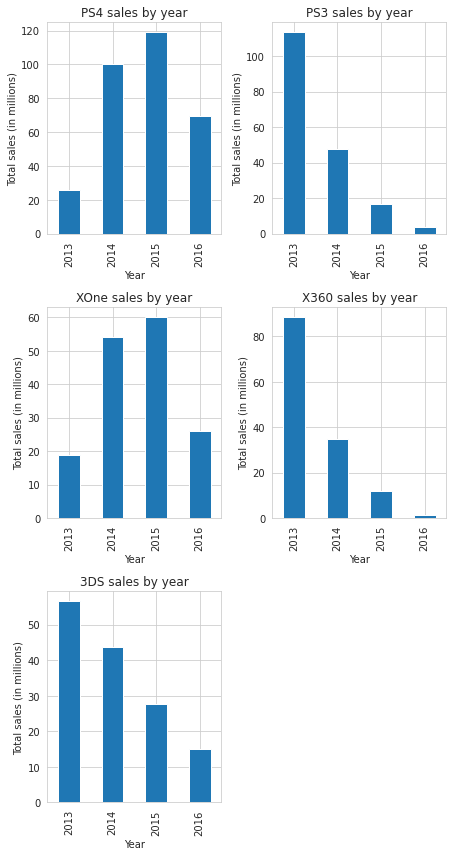

In [20]:
top_5_platforms_sales = total_sales_platform[:5]
print(top_5_platforms_sales)

fig, axes = plt.subplots(3,2, figsize=(6.4,12))
axe = axes.flatten()
fig.delaxes(axe[5])

for i, (key, value) in enumerate(top_5_platforms_sales.items()):
    platform_sales = df_recent.query(f'platform == "{key}"')
    platform_sales_yearly = platform_sales.groupby(['year_of_release'])['total_sales'].sum()
    platform_sales_yearly.plot(
        kind='bar',
        ax=axe[i],
        xlabel='Year',
        ylabel='Total sales (in millions)',
        title=f'{key} sales by year'
    )
plt.tight_layout()
plt.show()

Based on the plots of sales for each of the top 5 platforms over the last 3 years, we see the newer platforms (PS4, XOne) with more growth in sales, while the older models of those platforms (PS3, X360) have shrank in sales (along with 3DS sales).

### Global Sales

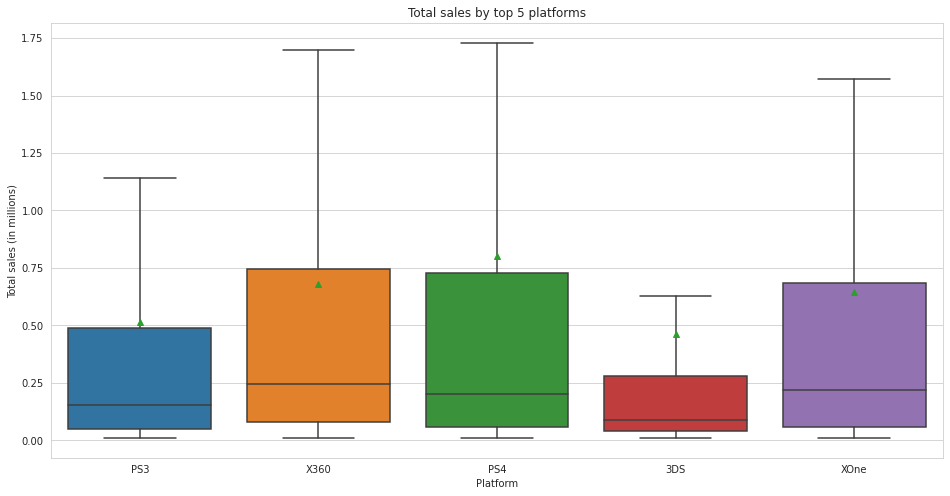

In [21]:
df_top_platforms_total_sales = df_recent[df_recent['platform'].isin(top_5_platforms_sales.index)]

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.boxplot(
    data=df_top_platforms_total_sales,
    x='platform',
    y='total_sales',
    showmeans=True,
    showfliers=False
)
plt.xlabel('Platform')
plt.ylabel('Total sales (in millions)')
plt.title('Total sales by top 5 platforms')
plt.show()

Next, we plot global sales for each of the top 5 platforms side-by-side with any outliers removed.

Similarities among the platforms include (relative to the interquartile ranges): small lower fences compared to upper fences, medians falling within a similar/certain range, and means falling somewhere at the end of or past the third quartile (Q3).

The platforms with the largest distributions are X360, XOne, and PS4.

### Scores

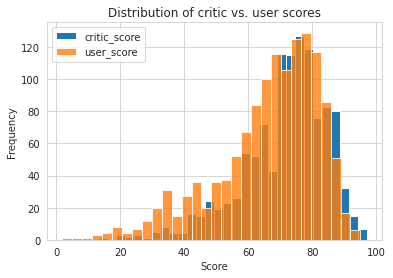

In [22]:
df_recent['critic_score'].plot(
    kind='hist',
    bins=30
    
)
df_recent['user_score'].plot(
    kind='hist',
    bins=30,
    alpha=0.8
)
plt.xlabel('Score')
plt.title('Distribution of critic vs. user scores')
plt.legend()
plt.show()

We plot a histogram to compare critic vs. user scores. The two seem to trend in a similar way, although it looks like user scores are a bit larger in frequency vs. critic scores. Regardless of critic or user, scores seem to be favorable in general.

Correlation coeffcient for PS4 total sales vs. critic score: 0.41
Correlation coeffcient for PS4 total sales vs. user score: -0.03
Correlation coeffcient for PS3 total sales vs. critic score: 0.33
Correlation coeffcient for PS3 total sales vs. user score: 0.02
Correlation coeffcient for XOne total sales vs. critic score: 0.41
Correlation coeffcient for XOne total sales vs. user score: -0.09
Correlation coeffcient for X360 total sales vs. critic score: 0.36
Correlation coeffcient for X360 total sales vs. user score: -0.01
Correlation coeffcient for 3DS total sales vs. critic score: 0.34
Correlation coeffcient for 3DS total sales vs. user score: 0.28


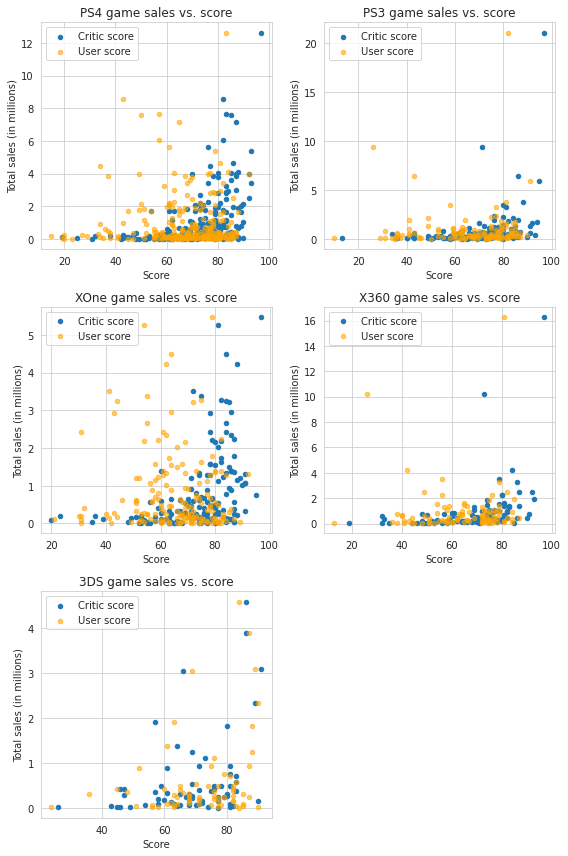

In [23]:
top_5_platforms_keys = list(top_5_platforms_sales.keys())
df_top_5_platforms = df_recent.query(f'platform == {top_5_platforms_keys}')
df_scores_sales = df_top_5_platforms.dropna(subset=['critic_score', 'user_score']).reset_index(drop=True)

fig, axes = plt.subplots(3,2, figsize=(8,12))
axe = axes.flatten()
fig.delaxes(axe[5])

for i, key in enumerate(top_5_platforms_keys):
    platform_sales = df_scores_sales.query(f'platform == "{key}"')
    platform_sales.plot(
        kind='scatter',
        ax=axe[i],
        x='critic_score',
        y='total_sales',
        grid=True,
        label='Critic score',
        title=f'{key} game sales vs. score',
    )
    platform_sales.plot(
        kind='scatter',
        ax=axe[i],
        x='user_score',
        y='total_sales',
        grid=True,
        label='User score',
        ylabel='Total sales (in millions)',
        alpha=0.6,
        color='orange',
    ).set_xlabel('Score')
    critic_score_corr = platform_sales['critic_score'].corr(platform_sales['total_sales']).round(2)
    user_score_corr = platform_sales['user_score'].corr(platform_sales['total_sales']).round(2)
    print(f'Correlation coeffcient for {key} total sales vs. critic score: {critic_score_corr}')
    print(f'Correlation coeffcient for {key} total sales vs. user score: {user_score_corr}')
plt.tight_layout()
plt.show()

Next, we plot critic and user scores together to see how they correlate to sales for the top 5 platforms. Based on the distribution, visually it looks like game sales do have a degree of positive correlation with critic scores (the better score, the better the sales, and vice versa).

This is confirmed by the calculations of the correlation coefficients, however small the results. Critic scores and total sales have slightly positive correlation, whereas a majority of the user scores have negative correlation. Only for games sold on 3DS are critic and user scores showing similar correlation.

### Sales of the same games on different platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,6.46,86.0,43.0,E
1,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,6.08,82.0,57.0,E
2,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,4.28,NaN,45.0,E
3,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,4.22,84.0,42.0,E
4,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,3.01,87.0,63.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
75,Adventure Time: Finn & Jake Investigations,X360,2015,Action,0.03,0.05,0.00,0.01,0.09,NaN,NaN,Unknown
76,Terraria,PS4,2014,Action,0.00,0.05,0.01,0.01,0.07,83.0,79.0,T
77,The Amazing Spider-Man 2 (2014),3DS,2014,Action,0.03,0.03,0.00,0.01,0.07,NaN,NaN,Unknown
78,Adventure Time: Finn & Jake Investigations,XOne,2015,Action,0.03,0.02,0.00,0.00,0.05,NaN,NaN,Unknown


name
FIFA 15                         15.92
FIFA 14                         15.08
LEGO Marvel Super Heroes         7.61
The LEGO Movie Videogame         4.09
LEGO Jurassic World              3.90
Lego Batman 3: Beyond Gotham     3.43
Skylanders SWAP Force            3.27
Skylanders: Trap Team            2.65
LEGO The Hobbit                  2.02
LEGO Marvel's Avengers           1.83
Name: total_sales, dtype: float64


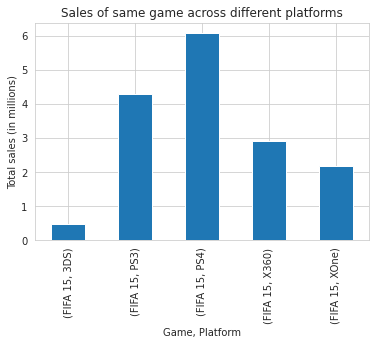

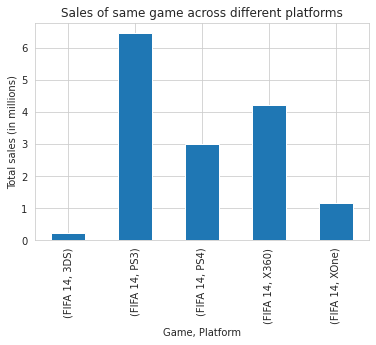

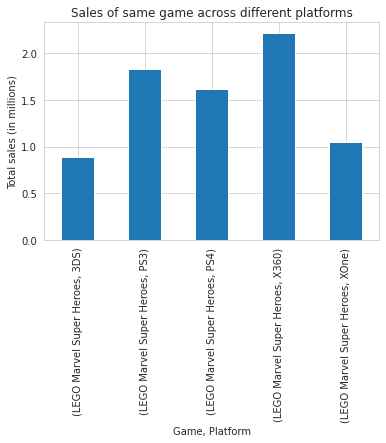

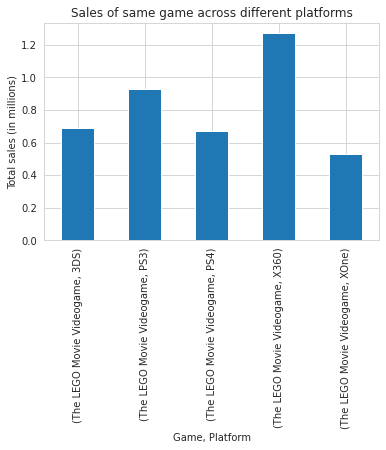

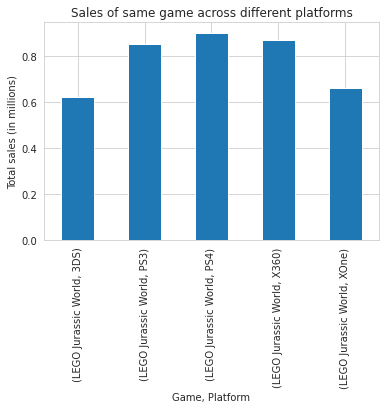

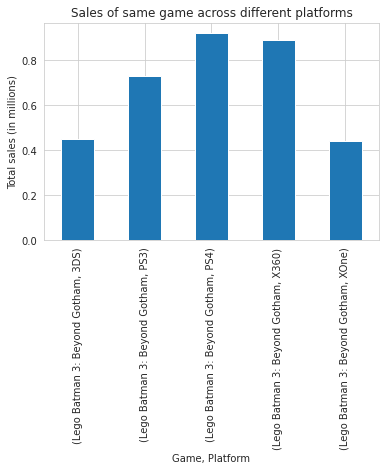

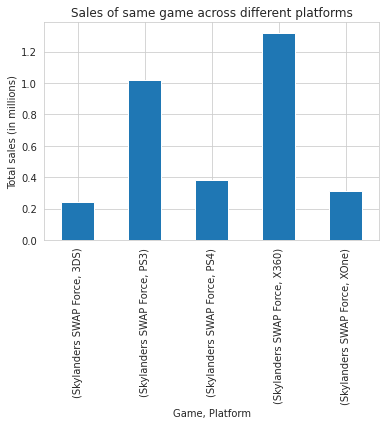

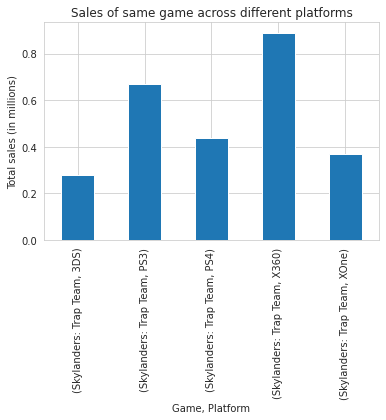

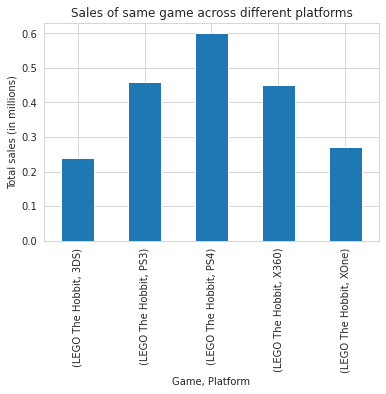

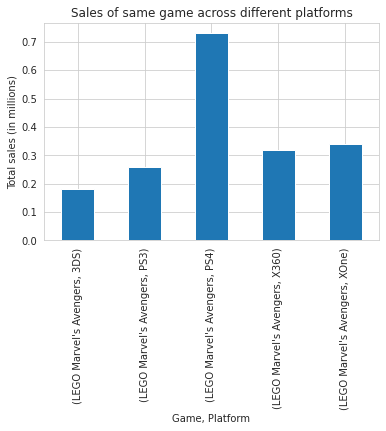

In [24]:
df_games_multiple_platforms = df_recent[df_recent['platform'].isin(top_5_platforms_keys)]
df_games_multiple_platforms = df_games_multiple_platforms.groupby('name').filter(lambda x: len(x) == 5).reset_index(drop=True)
display(df_games_multiple_platforms)

top_10_games_top_5_platforms_sales = df_games_multiple_platforms.groupby('name')['total_sales'].sum().sort_values(ascending=False)[:10]
print(top_10_games_top_5_platforms_sales)

for i, (key, value) in enumerate(top_10_games_top_5_platforms_sales.items()):
    game_sales = df_games_multiple_platforms.query(f'name == "{key}"')
    game_total_sales = game_sales.groupby(['name', 'platform'])['total_sales'].sum()
    game_total_sales.plot(
        kind='bar',
        xlabel='Game, Platform',
        ylabel='Total sales (in millions)',
        title='Sales of same game across different platforms'
    )
    plt.show()

Next, we compare the sales of the (top 10) same games on other platforms (the top 5 in sales we've been focusing on).

We see PS4 leading in sales for the same games more often than not, and in other instances we see X360 and PS3 leading. Also surprising to note is how XOne never leads in sales of the same game, despite being the third best-selling platform among the top 5 platforms, even ahead of X360. The newness of the model could explain why it lags behind, although this also reveals how much more popular Playstation models are vs. XBox, that regardless of the current model or the previous one, users are typically buying the most games for this make.

### Genres

genre
Shooter         1.140514
Sports          0.672852
Platform        0.533929
Role-Playing    0.483398
Fighting        0.436739
Action          0.422126
Racing          0.417315
Misc            0.407826
Simulation      0.304744
Puzzle          0.208929
Strategy        0.177879
Adventure       0.109412
Name: total_sales, dtype: float64

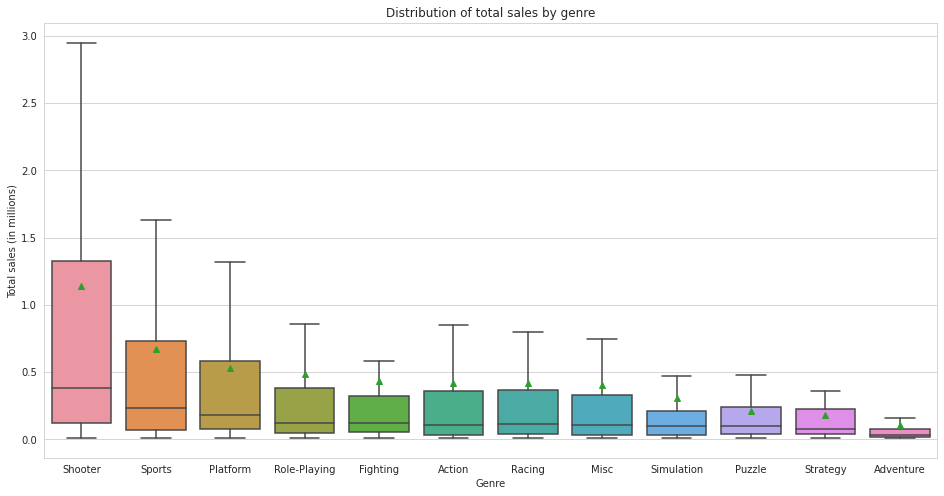

In [25]:
genres_sales_avg = df_recent.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
display(genres_sales_avg)

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.boxplot(
    data=df_recent,
    order=genres_sales_avg.index,
    x='genre',
    y='total_sales',
    showmeans=True,
    showfliers=False
)
plt.xlabel('Genre')
plt.ylabel('Total sales (in millions)')
plt.title('Distribution of total sales by genre')
plt.show()

When looking at the plots for genre vs. sales, on average Shooter, Sports, and Platform games are the most profitable on one end, whereas Puzzle, Strategy, and Adventure games are the least profitable on the other. Shooter games have the largest distribution in sales of this genre.

We might be able to generalize these trends in terms of players' preferences for fast gameplay with more action and excitement, compared to games that are slower and require more time, strategy, and thinking to play.

## User profile per region

### By platform

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,88.39,44.96,NaN
PS3,66.86,70.89,24.13
3DS,39.04,31.17,67.86
PSV,NaN,NaN,18.66
WiiU,NaN,NaN,10.88


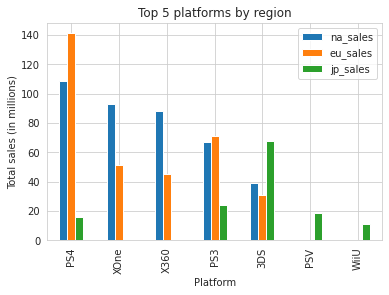

In [26]:
def region_top_5_pivot_table(category, region, aggfunc):
    return df_recent.pivot_table(
        index=category,
        values=region,
        aggfunc=aggfunc
    ).sort_values(by=region, ascending=False)[:5]

na_region_top_platforms = region_top_5_pivot_table('platform', 'na_sales', 'sum')
eu_region_top_platforms = region_top_5_pivot_table('platform', 'eu_sales', 'sum')
jp_region_top_platforms = region_top_5_pivot_table('platform', 'jp_sales', 'sum')

all_regions_top_platforms = na_region_top_platforms.merge(
    eu_region_top_platforms,
    on='platform'
).merge(
    jp_region_top_platforms,
    on='platform',
    how='outer'
)
display(all_regions_top_platforms)

all_regions_top_platforms.plot(
    kind='bar',
    xlabel='Platform',
    ylabel='Total sales (in millions)',
    title='Top 5 platforms by region'
)
plt.show()

Here we look at user profiles per region by platform. Since the overall top 5 platforms don't all overlap across NA, EU, and JP, we extract the top 5 platforms _per region_ and combine it into one plot.

We see some similarities between NA and EU, which share the same overall top 5 platforms. NA sales are typically higher than EU sales, with the exception of PS4 sales, which comes in as the top platform for NA and EU, but for which EU surpasses NA. EU's second best-selling platform is PS3, where it again surpasses NA sales by a slight margin.

JP sales dominates both NA and EU for one platform, 3DS, which in itself outsells the remaining top 4 platforms (PS3, PSV, PS4, WiiU). Its sales trail that of EU's. All three regions share three out of their top 5 platforms: PS4, PS3, and 3DS and PS3. PSV and WiiU sales factor in the JP region only.

### By genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,141.89,126.27,41.78
Shooter,117.15,90.68,6.69
Sports,78.50,65.98,NaN
Role-Playing,47.17,37.44,53.06
Misc,35.19,NaN,10.29
Racing,NaN,22.21,NaN
Fighting,NaN,NaN,7.85


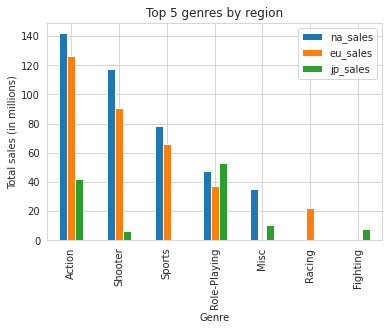

In [27]:
na_region_top_genres = region_top_5_pivot_table('genre', 'na_sales', 'sum')
eu_region_top_genres = region_top_5_pivot_table('genre', 'eu_sales', 'sum')
jp_region_top_genres = region_top_5_pivot_table('genre', 'jp_sales', 'sum')

all_regions_top_genres = na_region_top_genres.merge(
    eu_region_top_genres,
    on='genre',
    how='outer'
).merge(
    jp_region_top_genres,
    on='genre',
    how='outer'
)
display(all_regions_top_genres)

all_regions_top_genres.plot(
    kind='bar',
    xlabel='Genre',
    ylabel='Total sales (in millions)',
    title='Top 5 genres by region'
)
plt.show()

Here we look at user profiles per region by genre. Since the overall top 5 platforms don't all overlap across NA, EU, and JP, we extract the top 5 platforms _per region_ and combine it into one plot.

We see similarities between NA and EU, which share the same top 4 genres (Action, Shooter, Sports, Role-Playing). NA sales lead over EU and JP. JP sales are led by Role-Playing and have zero sales of games for Sports and Racing genres. Its sales are significantly less than that of NA and EU respectively. All three regions share three out of their top 5 genres: Action, Shooter, and Role-Playing. NA region sees zero sales for Racing and Fighting games, whereas EU sees zero sales for Misc and Fighting games.

### By rating

As we'll see, when looking at the share per region, games by their rating category do seem to affect sales.

rating
E          19.683613
E10+       12.490440
M          34.375881
RP          0.000000
T          12.466288
Unknown    20.983778
Name: na_sales, dtype: float64


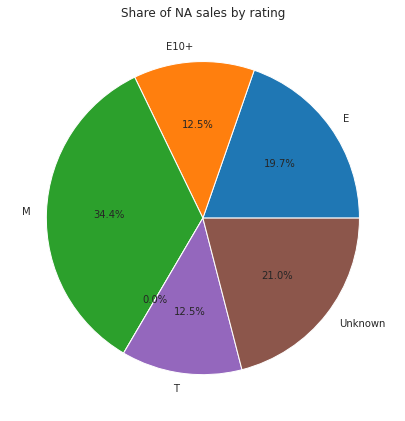

In [28]:
# Determine if ratings affect sales per region
na_region_rating_sales = df_recent.groupby('rating')['na_sales'].sum()
na_region_rating_sales_total = na_region_rating_sales.sum()
na_region_rating_percent = (na_region_rating_sales / na_region_rating_sales_total) * 100
print(na_region_rating_percent)

na_region_rating_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Share of NA sales by rating',
    figsize=(7.2,7.2)
)
plt.ylabel('')
plt.show()

In NA, a Mature rating has the largest share of sales. This is followed by Unknown and Everyone in the second largest share. Teen and Everyone 10+ have almost identical sales in third. Rating Pending games have zero sales.

rating
E          21.536394
E10+       11.485757
M          35.827594
RP          0.011999
T          11.324966
Unknown    19.813290
Name: eu_sales, dtype: float64


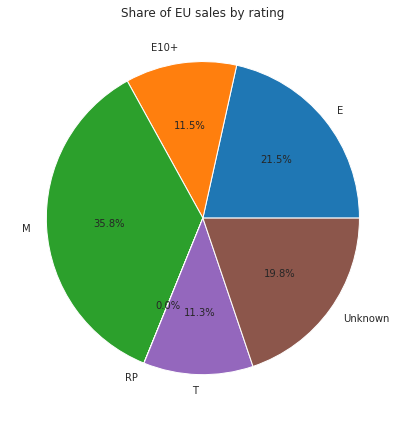

In [29]:
eu_region_rating_sales = df_recent.groupby('rating')['eu_sales'].sum()
eu_region_rating_sales_total = eu_region_rating_sales.sum()
eu_region_rating_percent = (eu_region_rating_sales / eu_region_rating_sales_total) * 100
print(eu_region_rating_percent)

eu_region_rating_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Share of EU sales by rating',
    figsize=(7.2,7.2)
)
plt.ylabel('')
plt.show()

In EU, like with the NA region, a Mature rating has the largest share of sales. This is followed by Everyone and Unknown in the second largest share. Teen and Everyone 10+ have slightly similar sales in third. Rating Pending games have zero sales.

rating
E          10.367507
E10+        3.993762
M          10.014917
RP          0.000000
T          14.435856
Unknown    61.187958
Name: jp_sales, dtype: float64


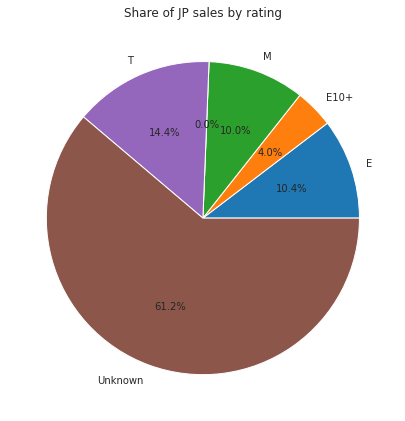

In [30]:
jp_region_rating_sales = df_recent.groupby('rating')['jp_sales'].sum()
jp_region_rating_sales_total = jp_region_rating_sales.sum()
jp_region_rating_percent = (jp_region_rating_sales / jp_region_rating_sales_total) * 100
print(jp_region_rating_percent)

jp_region_rating_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Share of JP sales by rating',
    figsize=(7.2,7.2)
)
plt.ylabel('')
plt.show()

In JP, the largest share of sales is of games with Unknown ratings. After that, the best-selling ratings are shuffled a bit as compared to NA and EU sales: a Teen rating has the next leading share of sales, followed closely by similar sales for Everyone and Mature games. Everyone 10+ sold the least, with zero sales going to Rating Pending.

## Test Hypotheses

For the final section, we will be testing following two hypotheses:
1. "Average user ratings of Xbox One and PC platforms are the same"
    1. **H₀** (null hypothesis): The average user ratings of Xbox One games is equal to the average user ratings of PC games
    2. **H₁** (alternative hypothesis): The average user ratings of Xbox One games is not equal to the average user ratings of PC games
2. "Average user ratings for Action and Sports genres are different"
    1. **H₀** (null hypothesis): The average user ratings of Action games is equal to the average user ratings of Sports games
    2. **H₁** (alternative hypothesis): The average user ratings of Action games is not equal to the average user ratings of Sports games

In [31]:
# Prepare the data
df_user_score_cleaned = df_recent.dropna(subset=['user_score']).reset_index(drop=True)
xone_user_score = df_user_score_cleaned.query('platform == "XOne"')['user_score'].astype(float)
pc_user_score = df_user_score_cleaned.query('platform == "PC"')['user_score'].astype(float)
print(xone_user_score)
print(pc_user_score)

14      79.0
16      54.0
20      64.0
27      62.0
42      41.0
        ... 
1309    68.0
1311    60.0
1313    82.0
1314    66.0
1317    67.0
Name: user_score, Length: 182, dtype: float64
59      39.0
130     79.0
137     52.0
154     22.0
165     60.0
        ... 
1295    83.0
1297    68.0
1302    79.0
1304    14.0
1318    76.0
Name: user_score, Length: 170, dtype: float64


In [32]:
# Test the hypotheses
def t_test(sample_1, sample_2, alpha=0.05):
    H_0 = 'We can\'t reject the null hypothesis: we don\'t have enough evidence to say that the averages of the first sample and the averages the second sample aren\'t the same'
    H_1 = 'We reject the null hypothesis: the average of the first sample is not equal to the average of the second sample'
    
    pvalue_levene = st.levene(sample_1, sample_2).pvalue

    if pvalue_levene < alpha:
        var_option = False
    else:
        var_option = True

    pvalue = st.ttest_ind(
        sample_1, 
        sample_2, 
        nan_policy='omit', 
        equal_var=var_option
    ).pvalue

    print(f'pvalue: {pvalue}')

    if pvalue < alpha:
        print(H_1)
    else:
        print(H_0)

t_test(xone_user_score, pc_user_score)

pvalue: 0.23850162736475636
We can't reject the null hypothesis: we don't have enough evidence to say that the averages of the first sample and the averages the second sample aren't the same


Based on the results of our test, we can't reject the null hypothesis. We find that the average user ratings of Xbox One games vs. those of PC games are the same.

In [33]:
# Prepare the data
action_user_score = df_user_score_cleaned.query('genre == "Action"')['user_score'].astype(float)
sports_user_score = df_user_score_cleaned.query('genre == "Sports"')['user_score'].astype(float)
print(action_user_score)
print(sports_user_score)

0       82.0
1       81.0
2       83.0
12      91.0
14      79.0
        ... 
1311    60.0
1315    85.0
1316    51.0
1317    67.0
1318    76.0
Name: user_score, Length: 423, dtype: float64
5       43.0
7       50.0
10      43.0
11      57.0
17      85.0
        ... 
1271    88.0
1273    69.0
1293    45.0
1304    14.0
1314    66.0
Name: user_score, Length: 182, dtype: float64


In [34]:
# Test the hypotheses
t_test(action_user_score, sports_user_score)

pvalue: 2.36720116620732e-16
We reject the null hypothesis: the average of the first sample is not equal to the average of the second sample


Based on the results of our test, we reject the null hypothesis. We find that the average user ratings of Action games vs. those of Sports games are different.

## Conclusion

Based on our analysis, we have a clear picture of how to forecast next year's sales based on the previous years' data from the last 3 years (2013 to present):
* Recently released games do well which is not surprising, so we should continue to carry an inventory of the latest games
* We know that games sell the most on 5 top platforms: PS4, PS3, XOne, X360, and 3DS. We see growth via the newer platforms among these (i.e. PS4, XOne), so we should continue to sell games for these platforms
* Critic scores have positive correlation to sales as opposed to user scores (with the exception of 3DS). Critic scores especially had a higher correlation for games on PS4 and XOne, a finding the augments the previous point about newer platforms
* For the same games sold across different platforms, we should add extra focus on three of the top platforms: PS4, PS3, and X360
* The more profitable genres to focus on and sell will be Shooter, Sports, and Platform. We should sell less Strategy, Puzzle and Adventure games
* To make rating vs. sales data more meaningful, we should make sure that the data collection is improved so that more games have their ratings accounted for. We had to deal with too many missing (unknown) ratings for this analysis. We should also consider ignoring games with Rating Pending in the future as those sales seem insignificant for forecasting
* Based on the two hypotheses tested, we can confirm that our initial guesses were correct: average user ratings are (1) the same for Xbox One vs. PC, but (2) different for Action vs. Sports games
* The strongest regions for sales will be NA, followed by EU, with NA being the priority
  * JP sales show different customer habits with regards to platform, genre, and rating. We should considering rethinking our strategy for selling to the JP region altogether next